## Introduction

## Data Description

## Steps

### import libraries

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly import express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Load Data

In [3]:
# save data filepath
data_file_path = 'melb_data.csv'
# read the data and store data in DataFrame titled house_price
house_data = pd.read_csv(data_file_path) 
# print top 5 rows of the data 
house_data.head(5)

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [4]:
# print a summary of the data
house_data.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

In [5]:
# prints information about house_price
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### clean data

In [6]:
house_data.shape

(13580, 21)

In [7]:
house_data.isna().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [8]:
house_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].describe(include='all')

BuildingArea    YearBuilt CouncilArea           Car
count    7130.000000  8205.000000       12211  13518.000000
unique           NaN          NaN          33           NaN
top              NaN          NaN    Moreland           NaN
freq             NaN          NaN        1163           NaN
mean      151.967650  1964.684217         NaN      1.610075
std       541.014538    37.273762         NaN      0.962634
min         0.000000  1196.000000         NaN      0.000000
25%        93.000000  1940.000000         NaN      1.000000
50%       126.000000  1970.000000         NaN      2.000000
75%       174.000000  1999.000000         NaN      2.000000
max     44515.000000  2018.000000         NaN     10.000000

In [9]:
# fill null values of Categorical feature with mod 

In [10]:
clean_data=house_data
clean_data['CouncilArea'] = clean_data['CouncilArea'].fillna('Moreland')
clean_data['YearBuilt'] = clean_data['YearBuilt'].fillna(clean_data['YearBuilt'].mode()[0])

In [11]:
# fill null values of BuildingArea feature with mean
clean_data['BuildingArea'] = clean_data['BuildingArea'].fillna(clean_data['BuildingArea'].mean())

In [12]:
# fill null values of Car feature with median
clean_data['Car'] = clean_data['Car'].fillna(clean_data['Car'].median())

In [13]:
#  check if there is any missing values
clean_data.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [53]:
# drops missing values (think of na as "not available")
#data_without_null=house_data.dropna(axis=0)

In [54]:
#data_without_null.shape

(6196, 21)

### Data Visualization

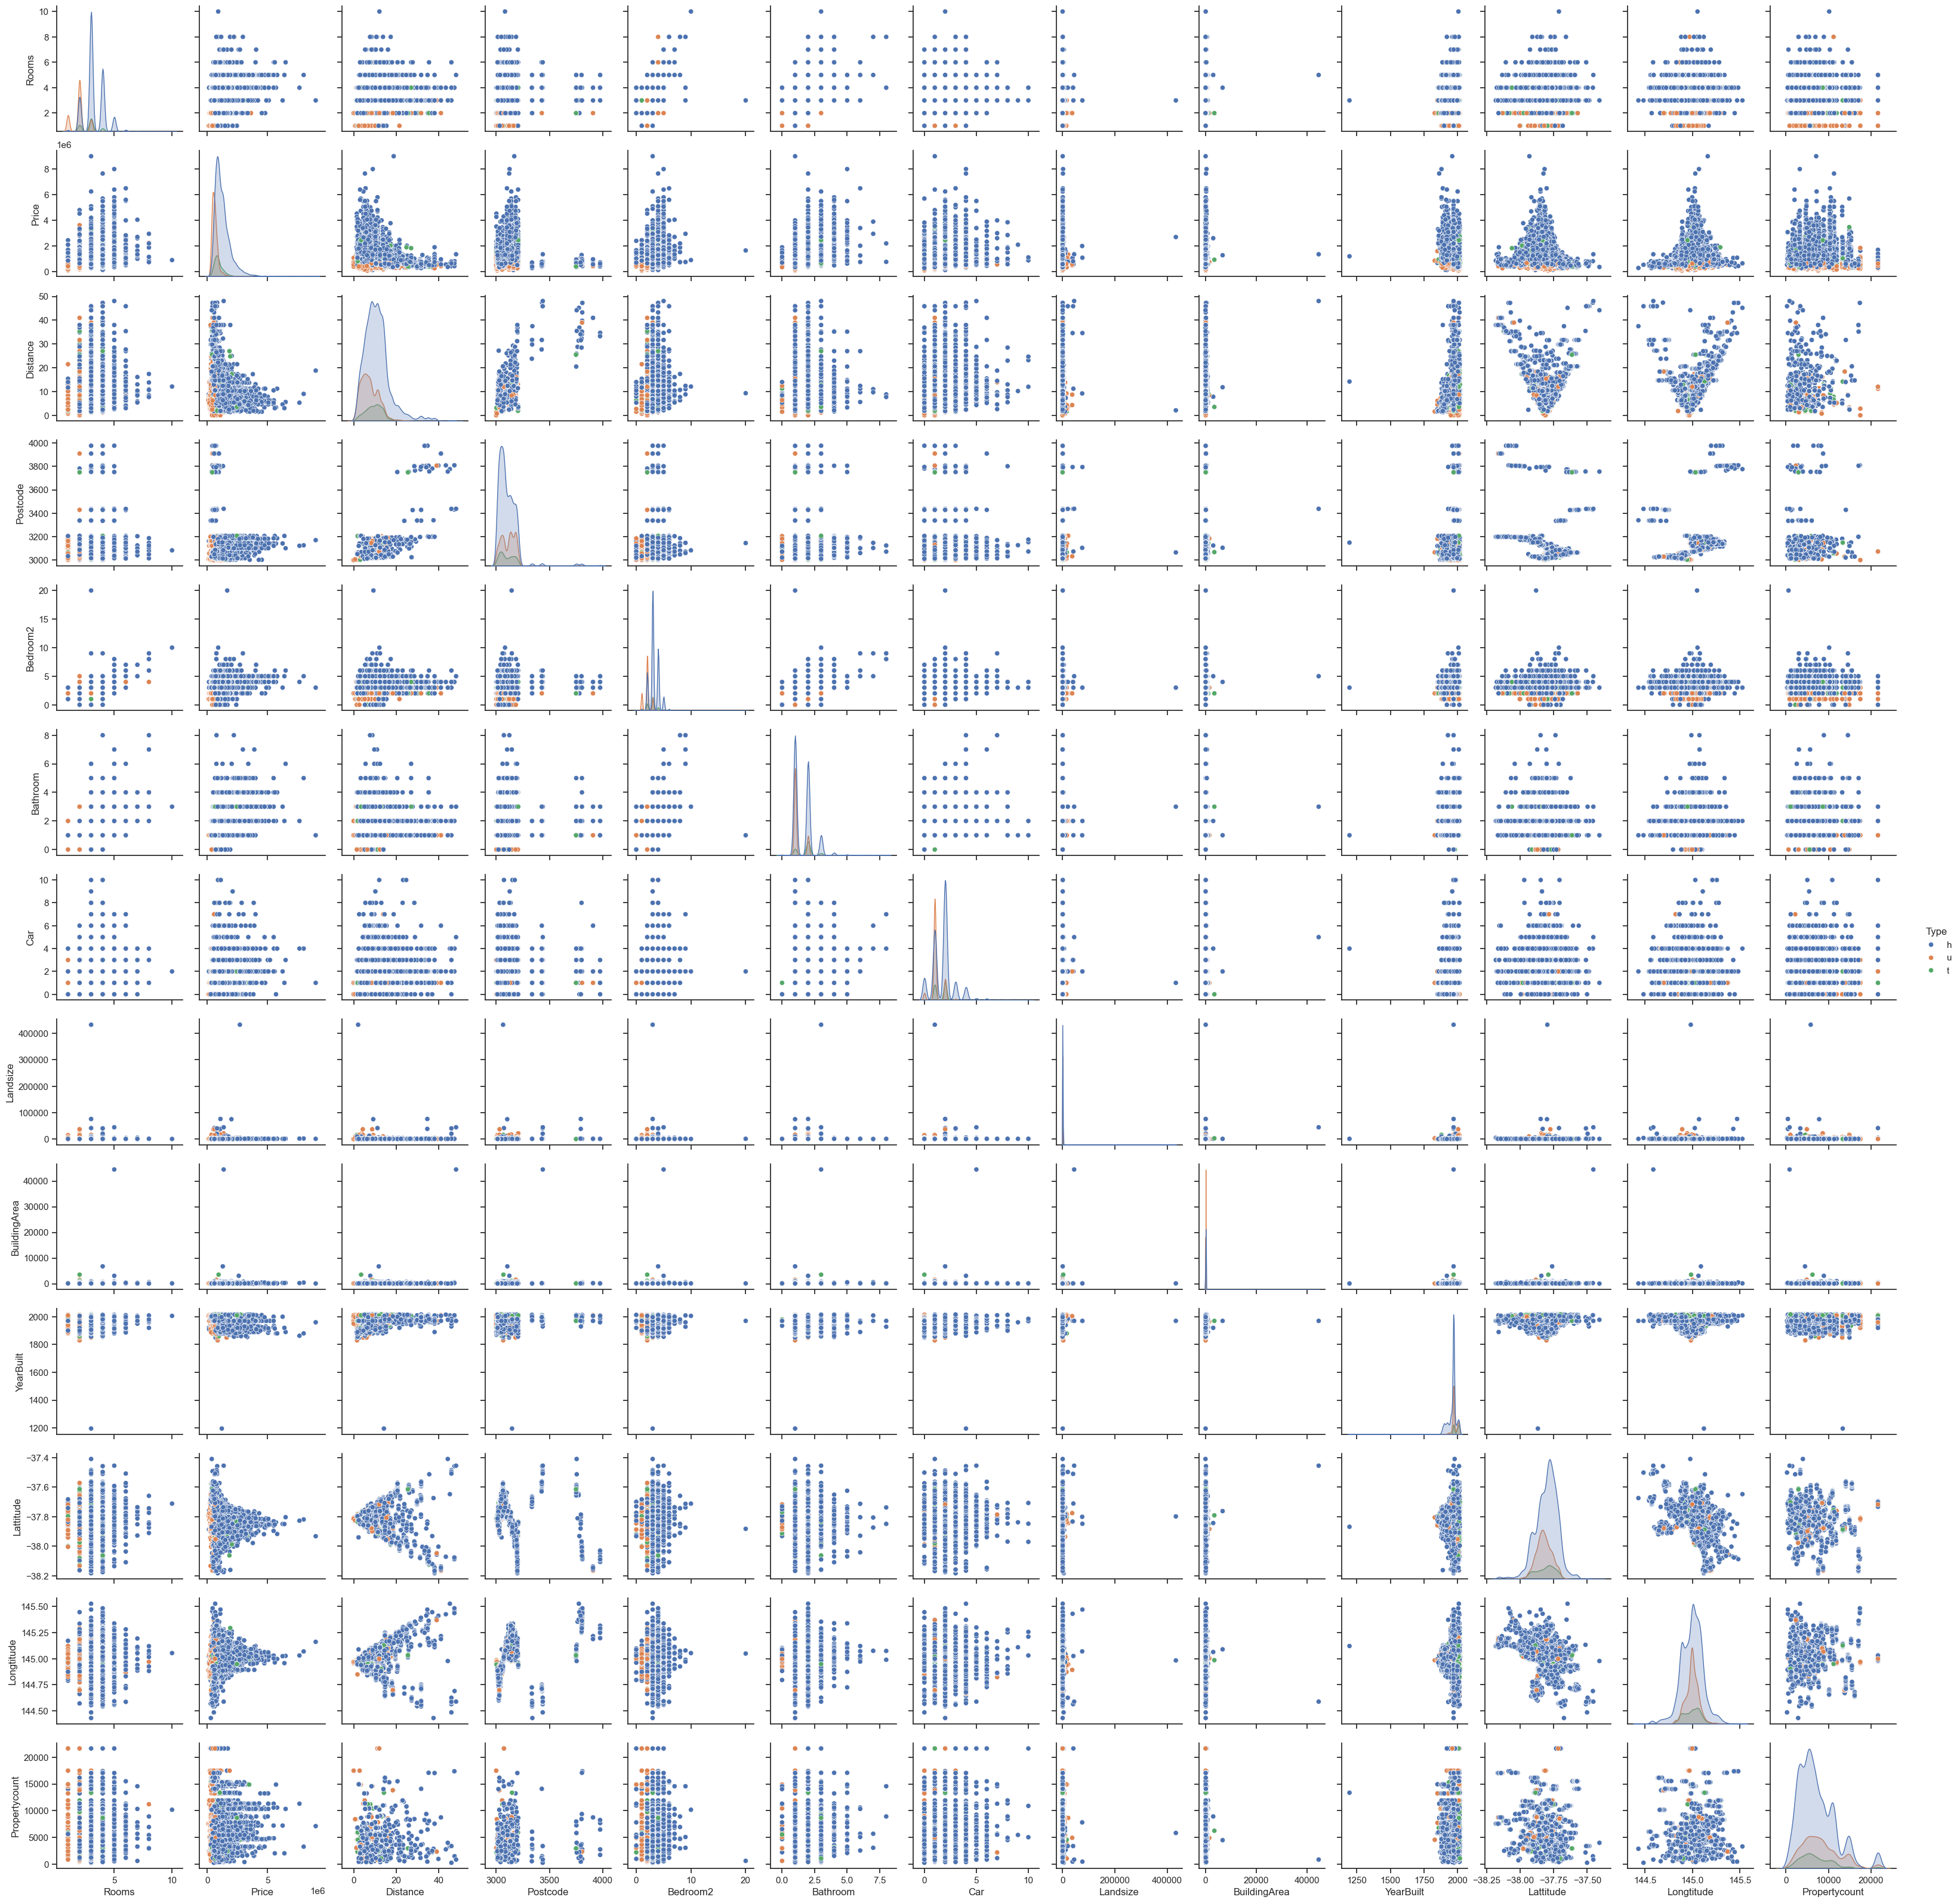

In [82]:
sns.set_theme(style="ticks")
sns.pairplot(clean_data, hue="Type")

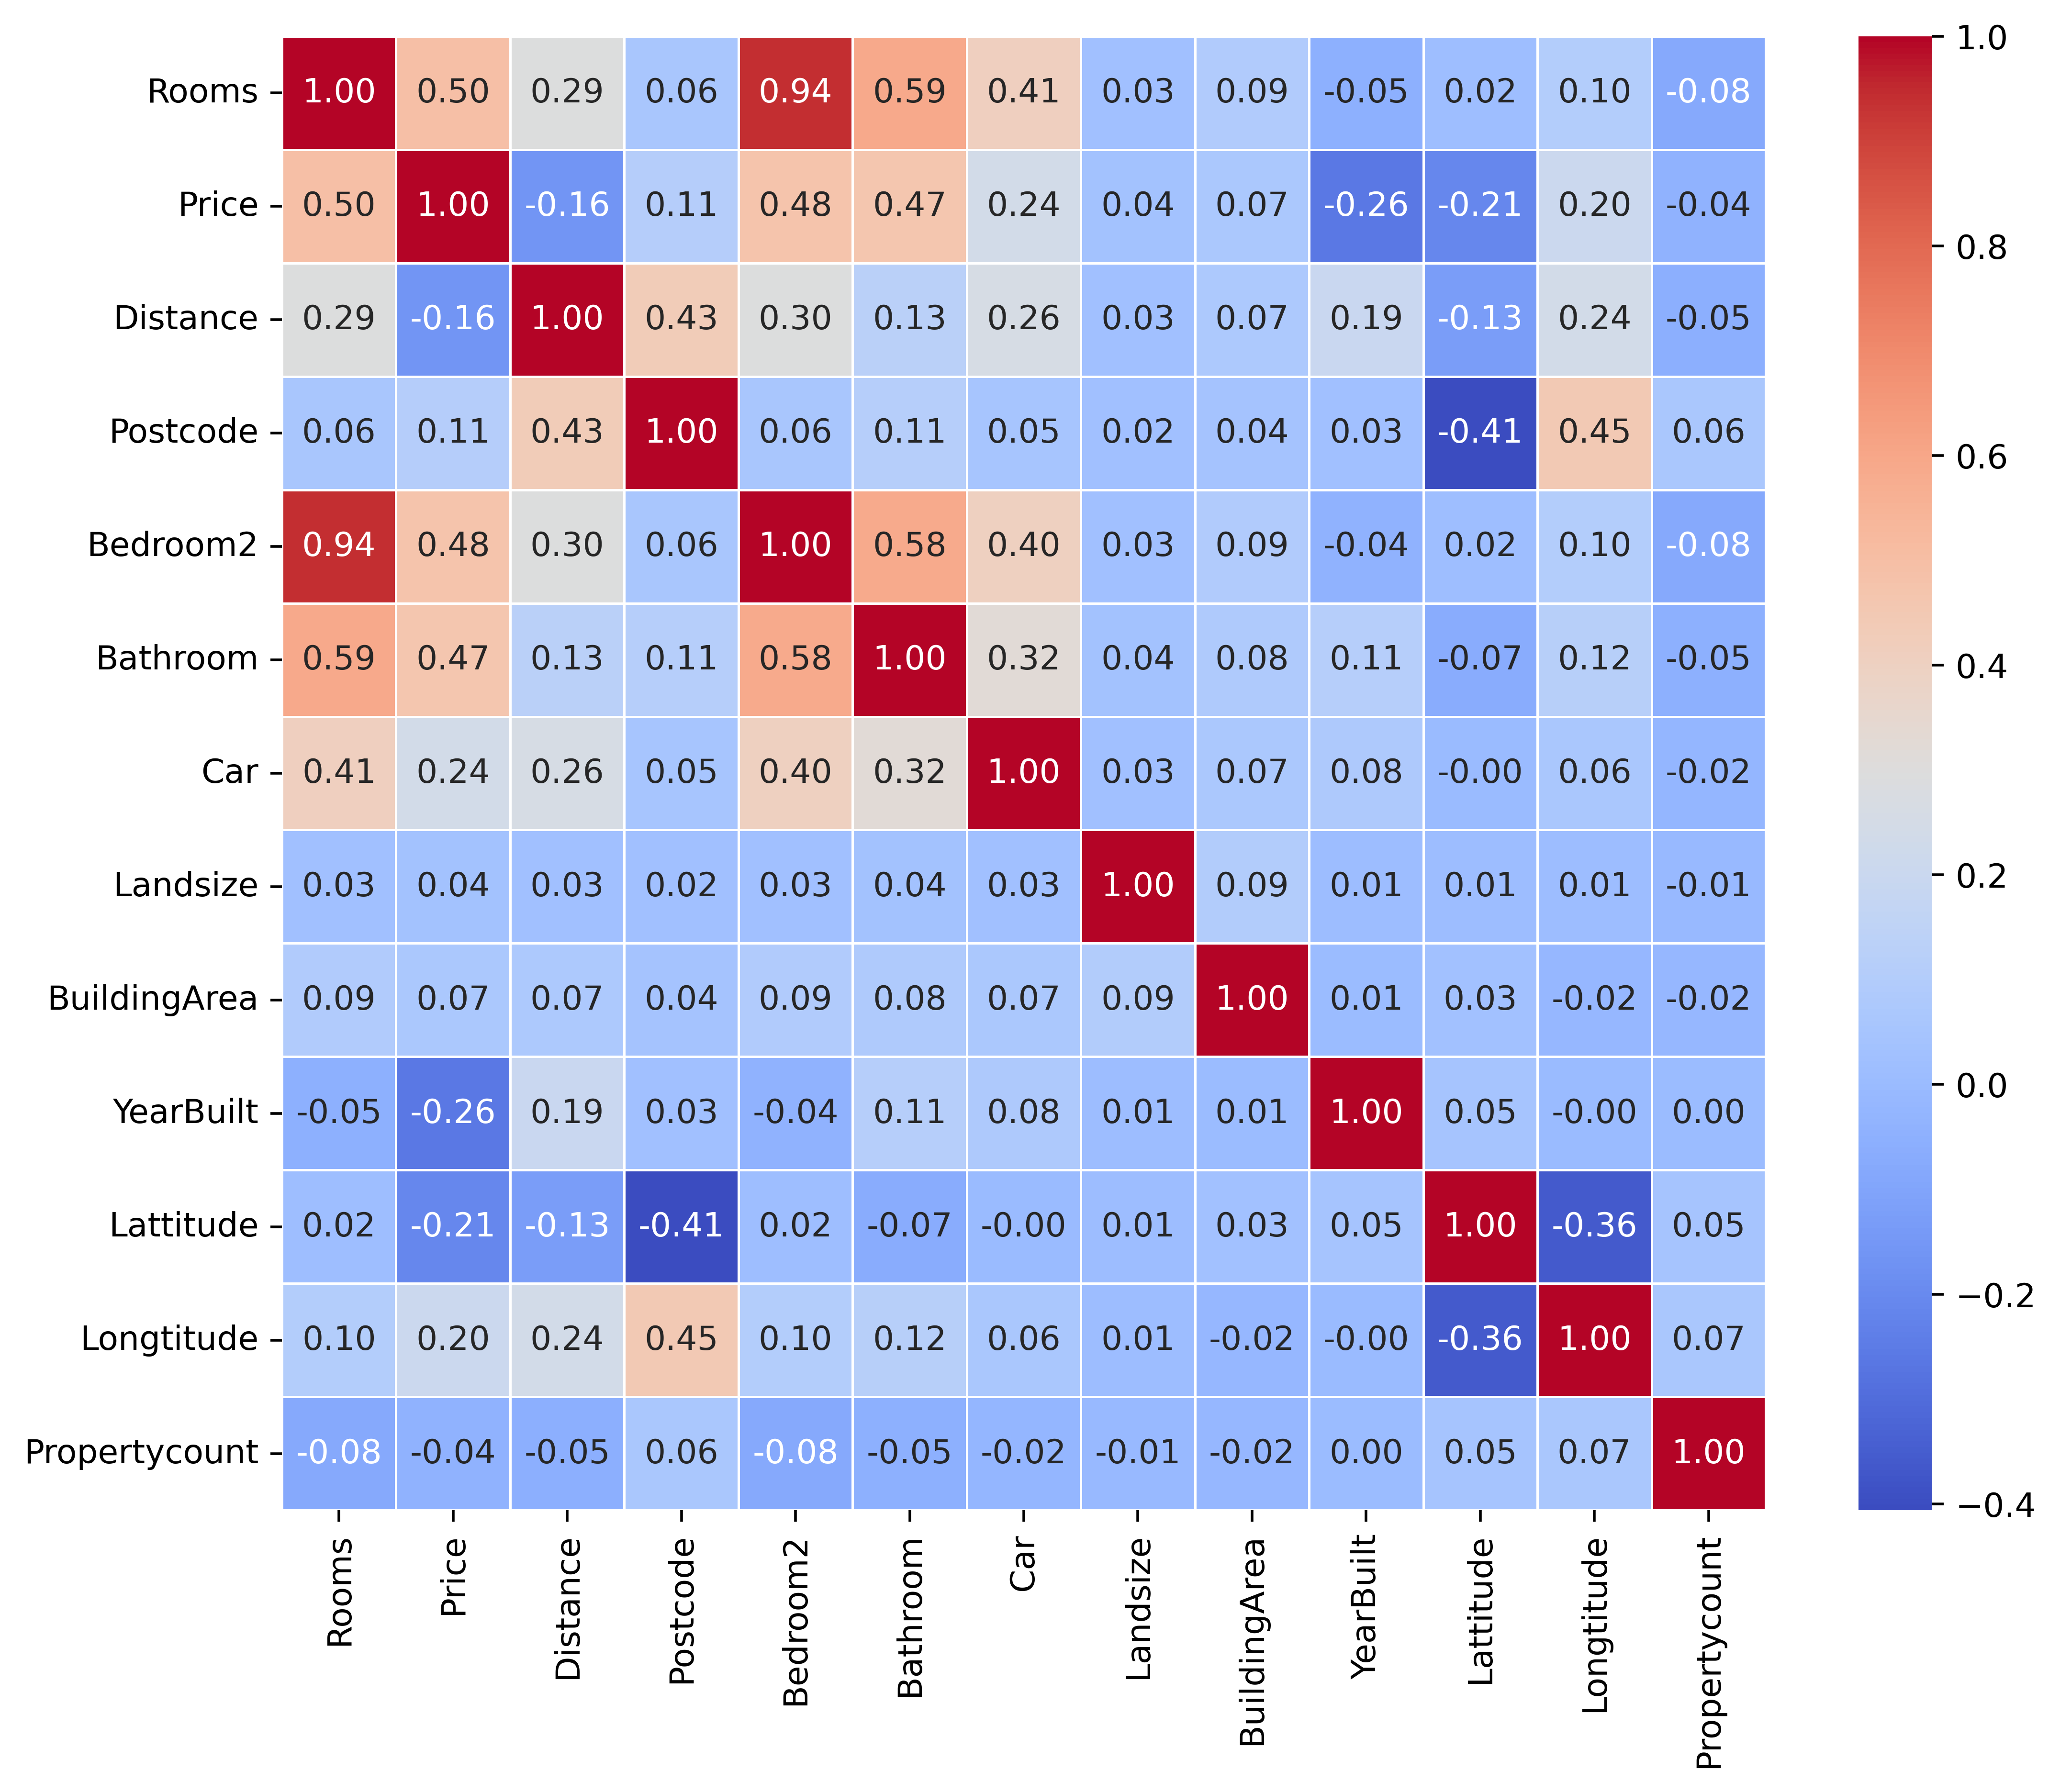

In [61]:

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(clean_data[clean_data.select_dtypes(['int', 'float']).columns].corr(),annot=True,fmt=".2f", linewidth=.5,cmap='coolwarm')
plt.show()

In [69]:
cat_features=clean_data.select_dtypes('object').columns

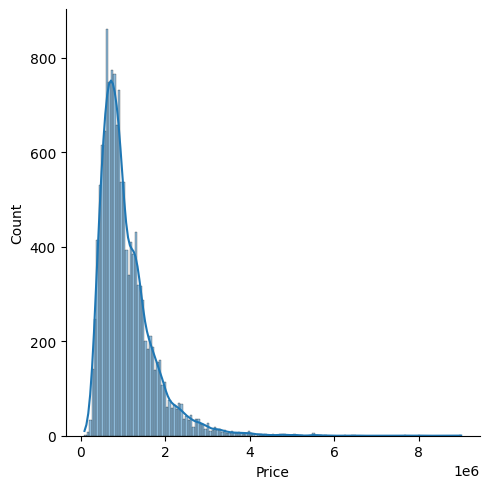

In [19]:
# Price distribution 
sns.displot(clean_data['Price'],kde=True)

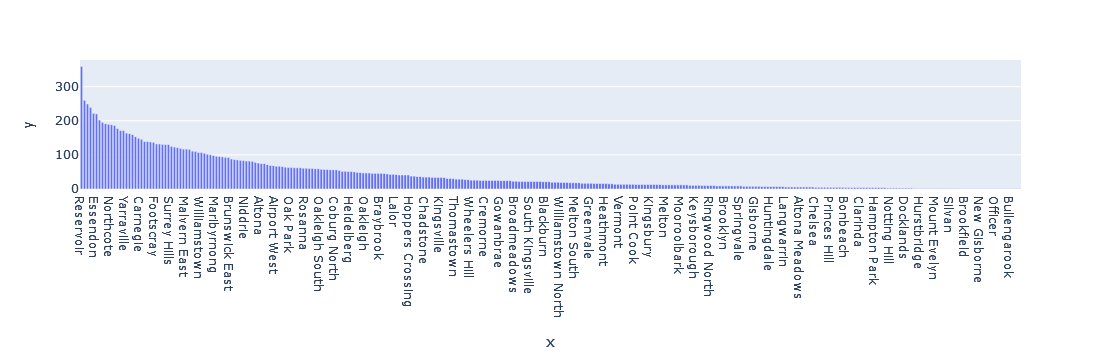

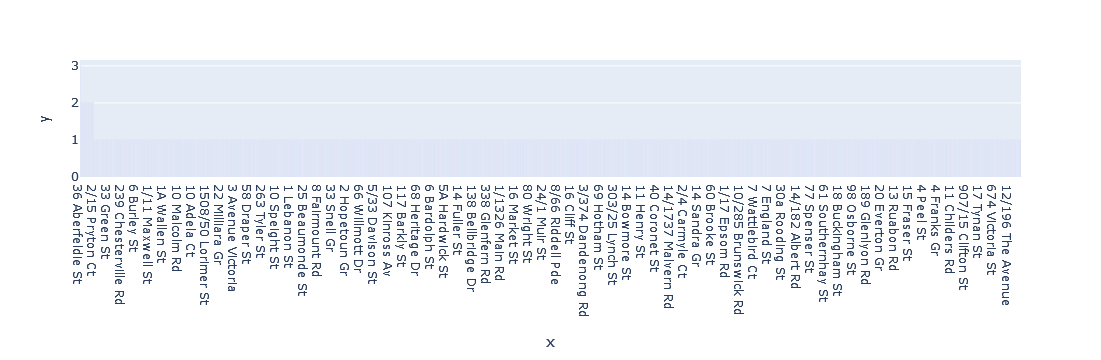

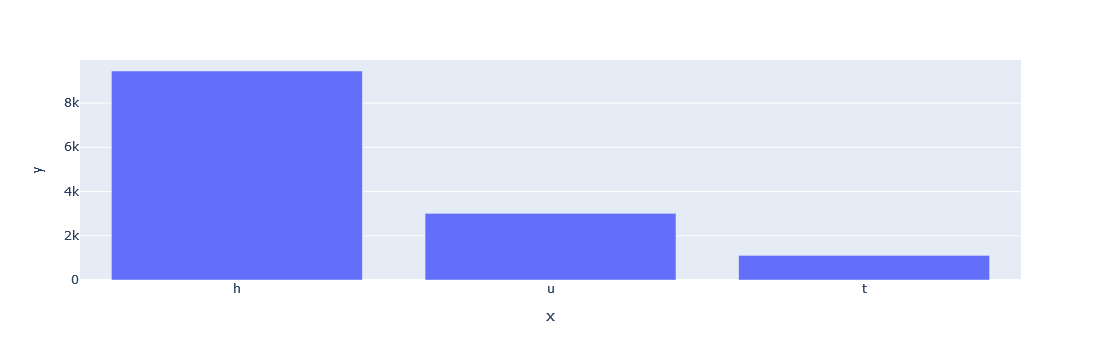

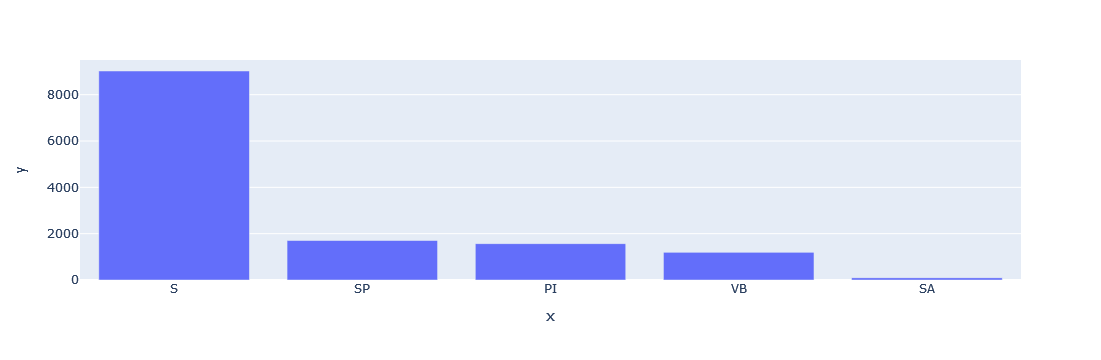

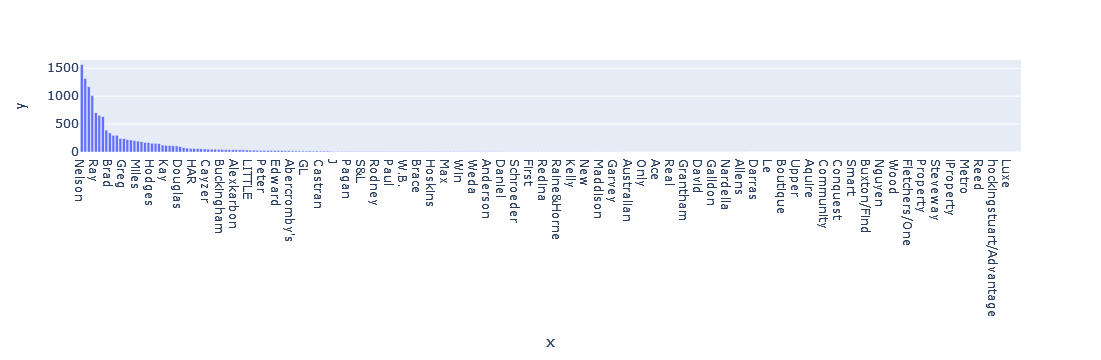

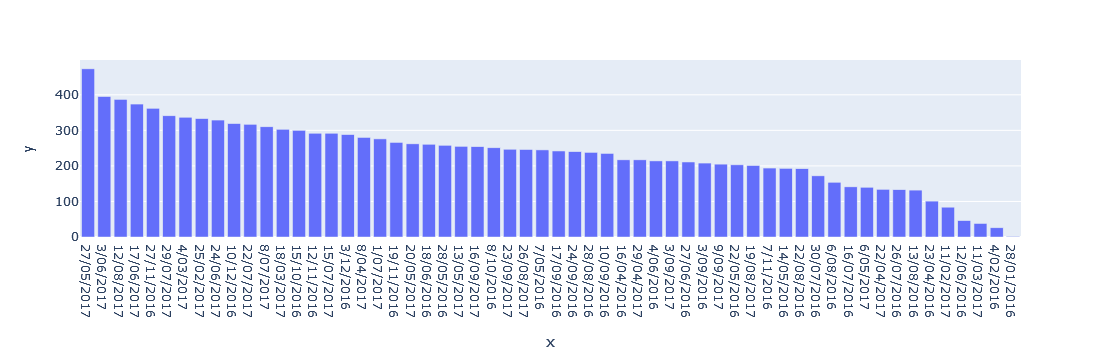

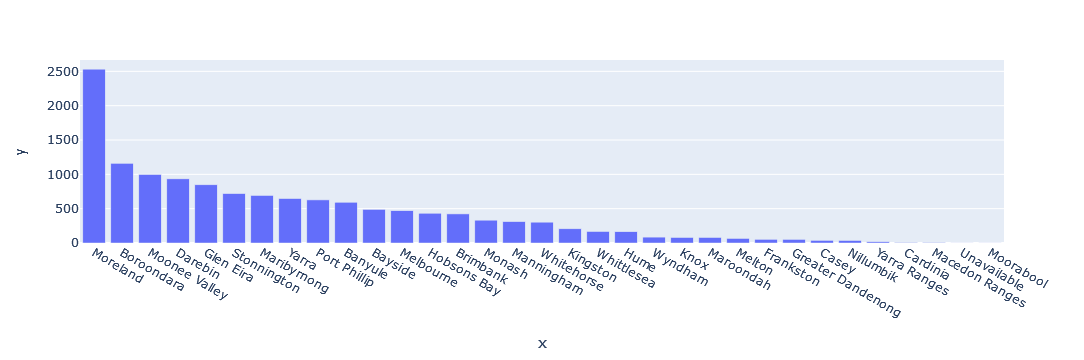

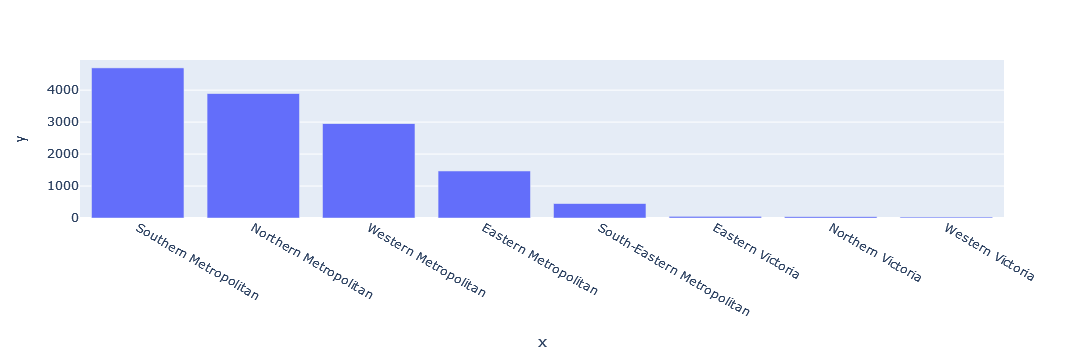

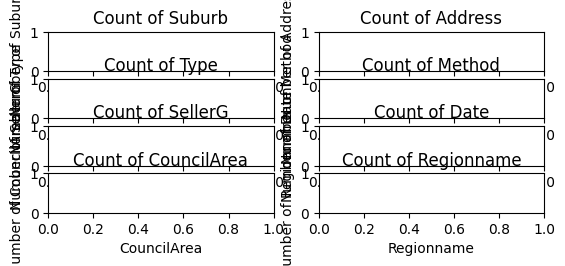

In [74]:

for idx, column in enumerate(cat_features):
    
    values_ = clean_data[column].value_counts();
 
    plt.subplot(len(cat_features), 2, idx+1)    
    
    fig = px.bar(x=values_.index, y=values_.values)
    fig.show()
    
    plt.title("Count of "+ column)
    plt.xlabel(column)
    plt.ylabel("Number of "+ column)
plt.show()   

In [75]:
# target 
y=clean_data.Price

In [76]:
# choose features
data_features = ['Rooms', 'Bathroom','Bedroom2', 'Landsize', 'Lattitude', 'Longtitude']

In [77]:
# prepare dataset
X = clean_data[data_features]

In [78]:
X.describe()

Rooms      Bathroom      Bedroom2       Landsize     Lattitude  \
count  13580.000000  13580.000000  13580.000000   13580.000000  13580.000000   
mean       2.937997      1.534242      2.914728     558.416127    -37.809203   
std        0.955748      0.691712      0.965921    3990.669241      0.079260   
min        1.000000      0.000000      0.000000       0.000000    -38.182550   
25%        2.000000      1.000000      2.000000     177.000000    -37.856822   
50%        3.000000      1.000000      3.000000     440.000000    -37.802355   
75%        3.000000      2.000000      3.000000     651.000000    -37.756400   
max       10.000000      8.000000     20.000000  433014.000000    -37.408530   

         Longtitude  
count  13580.000000  
mean     144.995216  
std        0.103916  
min      144.431810  
25%      144.929600  
50%      145.000100  
75%      145.058305  
max      145.526350

### Build Model

In [84]:
house_model = LinearRegression().fit(X, y)


In [86]:
house_model.score(X, y)

0.33843396953328064

In [88]:
house_model.coef_

array([ 2.30404569e+05,  2.18656705e+05,  4.44946072e+03,  3.29302677e+00,
       -1.40587154e+06,  4.77136317e+05])

In [89]:
print("Making predictions")
print(X.head())
print("The predictions are")
print(house_model.predict(X.head()))

Making predictions
   Rooms  Bathroom  Bedroom2  Landsize  Lattitude  Longtitude
0      2       1.0       2.0     202.0   -37.7996    144.9984
1      2       1.0       2.0     156.0   -37.8079    144.9934
2      3       2.0       3.0     134.0   -37.8093    144.9944
3      3       2.0       3.0      94.0   -37.7969    144.9969
4      4       1.0       3.0     120.0   -37.8072    144.9941
The predictions are
[ 725524.94952729  734656.52251668 1190540.16780332 1174168.48039153
 1199146.45850316]
